In [0]:
import codecs
import matplotlib.pyplot as plt

class Present:

        def __init__(self,key,rounds):
                """Create a PRESENT cipher object

                key:    the key as a 128-bit or 80-bit rawstring
                rounds: the number of rounds as an integer, 32 by default
                """
                self.rounds = rounds
                if len(key) * 8 == 80:
                        self.roundkeys = generateRoundkeys80(string2number(key),self.rounds)
                elif len(key) * 8 == 128:
                        self.roundkeys = generateRoundkeys128(string2number(key),self.rounds)
                else:
                        raise ValueError( "Key must be a 128-bit or 80-bit rawstring")

        def encrypt(self,block):
                """Encrypt 1 block (8 bytes)

                Input:  plaintext block as raw string
                Output: ciphertext block as raw string
                """
                state = string2number(block)
                for i in range (self.rounds-1):
                        state = addRoundKey(state,self.roundkeys[i])
                        state = sBoxLayer(state)
                        state = pLayer(state)
                cipher = addRoundKey(state,self.roundkeys[-1])
                return number2string_N(cipher,8)

        def decrypt(self,block):
                """Decrypt 1 block (8 bytes)

                Input:  ciphertext block as raw string
                Output: plaintext block as raw string
                """
                state = string2number(block)
                for i in range (self.rounds-1):
                        state = addRoundKey(state,self.roundkeys[-i-1])
                        state = pLayer_dec(state)
                        state = sBoxLayer_dec(state)
                decipher = addRoundKey(state,self.roundkeys[0])
                return number2string_N(decipher,8)

        def get_block_size(self):
                return 8

#        0   1   2   3   4   5   6   7   8   9   a   b   c   d   e   f
Sbox= [0xc,0x5,0x6,0xb,0x9,0x0,0xa,0xd,0x3,0xe,0xf,0x8,0x4,0x7,0x1,0x2]
# x 0 1 2 3 4 5 6 7 8 9 A B C D E F
# S[x] C 5 6 B 9 0 A D 3 E F 8 4 7 1 2

Sbox_inv = [Sbox.index(x) for x in range(16)]
PBox = [0,16,32,48,1,17,33,49,2,18,34,50,3,19,35,51,
        4,20,36,52,5,21,37,53,6,22,38,54,7,23,39,55,
        8,24,40,56,9,25,41,57,10,26,42,58,11,27,43,59,
        12,28,44,60,13,29,45,61,14,30,46,62,15,31,47,63]


PBox_inv = [PBox.index(x) for x in range(64)]

def generateRoundkeys80(key,rounds):
        """Generate the roundkeys for a 80-bit key

        Input:
                key:    the key as a 80-bit integer
                rounds: the number of rounds as an integer
        Output: list of 64-bit roundkeys as integers"""
        roundkeys = []
        for i in range(1,rounds+1): # (K1 ... K32)
                # rawkey: used in comments to show what happens at bitlevel
                # rawKey[0:64]
                roundkeys.append(key >>16)
                #1. Shift
                #rawKey[19:len(rawKey)]+rawKey[0:19]
                key = ((key & (2**19-1)) << 61) + (key >> 19)
                #2. SBox
                #rawKey[76:80] = S(rawKey[76:80])
                key = (Sbox[key >> 76] << 76)+(key & (2**76-1))
                #3. Salt
                #rawKey[15:20] ^ i
                key ^= i << 15
        return roundkeys

def generateRoundkeys128(key,rounds):
        """Generate the roundkeys for a 128-bit key

        Input:
                key:    the key as a 128-bit integer
                rounds: the number of rounds as an integer
        Output: list of 64-bit roundkeys as integers"""
        roundkeys = []
        for i in range(1,rounds+1): # (K1 ... K32)
                # rawkey: used in comments to show what happens at bitlevel
                roundkeys.append(key >>64)
                #1. Shift
                key = ((key & (2**67-1)) << 61) + (key >> 67)
                #2. SBox
                key = (Sbox[key >> 124] << 124)+(Sbox[(key >> 120) & 0xF] << 120)+(key & (2**120-1))
                #3. Salt
                #rawKey[62:67] ^ i
                key ^= i << 62
        return roundkeys

def addRoundKey(state,roundkey):
        return state ^ roundkey

def sBoxLayer(state):
        """SBox function for encryption

        Input:  64-bit integer
        Output: 64-bit integer"""

        output = 0
        for i in range(16):
                output += Sbox[( state >> (i*4)) & 0xF] << (i*4)
        return output

def sBoxLayer_dec(state):
        """Inverse SBox function for decryption

        Input:  64-bit integer
        Output: 64-bit integer"""
        output = 0
        for i in range(16):
                output += Sbox_inv[( state >> (i*4)) & 0xF] << (i*4)
        return output

def pLayer(state):
        """Permutation layer for encryption

        Input:  64-bit integer
        Output: 64-bit integer"""
        output = 0
        for i in range(64):
                output += ((state >> i) & 0x01) << PBox[i]
        return output

def pLayer_dec(state):
        """Permutation layer for decryption

        Input:  64-bit integer
        Output: 64-bit integer"""
        output = 0
        for i in range(64):
                output += ((state >> i) & 0x01) << PBox_inv[i]
        return output

def string2number(i):
    """ Convert a string to a number

    Input: string (big-endian)
    Output: long or integer
    """
    return int(codecs.encode(i))
    
def number2string_N(i, N):
    """Convert a number to a string of fixed size

    i: long or integer
    N: length of string
    Output: string (big-endian)
    """
    s = '%0*x' % (N*2, i)
    return codecs.decode(s,'hex')


def bytes_to_int(bytes):
        result = 0

        for b in bytes:
            result = result * 256 + int(b)

        return result


def Binary(n):
     s = bin(n)

     # removing "0b" prefix
     s1 = s[2:].zfill(64)
     s2 = str(s1)
     return s2

def binaryToDecimal(n):
    return int(n,2)

import string

indata = []
outdata = []
# here is the integer
# print(bin(10018325639476897698)[2:])
import random
for i in range(10000):
  h = random.getrandbits(64)
  b = Binary(h)
  indata.insert(i,b)
  temp = ''
  for j in range(2, 7):
    data = Present("0100101001", j)
    k = data.encrypt(str(int(b,2)))
    d = bytes_to_int(k)
    a = Binary(d)
    temp += a
  outdata.insert(i,temp)
 # print(len(a))
# # a is the output and is also 64 bits long
# print(len("1000101100001000001111100001011011111001001101010110001001010101"))
# # print(len(Binary(bytes_to_int(k))))
#
# one part has been completed
# we have 2 arrays both of size 10000 and both contain a bit sequence of 64 bits.
import numpy as np
inmat = np.empty((10000,80))
outmat = np.empty((10000,64))

for i in range(10000):
  m = 0
  n = 4
  for k in range(80):
    part = outdata[i][m:n]
    part1 = binaryToDecimal(part)
    inmat[i][k] = part1
    m +=4
    n +=4


# for q in range(10000):
# for w in range(16):
# print(inmat[q][w])
# for i in range(10000):
#     print(outdata[i])

for i in range(10000):
  for k in range(64):
    part = indata[i][k]
    # part1 = binaryToDecimal(part)
    if(part == ''):
        continue
    # print(part)
    outmat[i][k] = part

# for q in range(10000):
#   for w in range(64):
#      print(outmat[q][w])

# now creating csv files
import csv
with open("Input_features.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(inmat)
with open("Label.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(outmat)

In [0]:
import copy
import numpy as np

def sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  cache = Z
  return A, cache

def relu(Z):
  A = np.maximum(0,Z)
  assert(A.shape == Z.shape)
  cache = Z 
  return A, cache

def derivative_sig(z):
    return z * (1-z)

def tanh(z):
  a = np.exp(z)
  b = np.exp(-z)
  cache = z
  return (a - b)/(a + b), cache

def sigmoid_gradient(dA, Z):
  A, Z = sigmoid(Z)
  dZ = dA * A * (1 - A)

  return dZ


def tanh_gradient(dA, Z):
  A, Z = tanh(Z)
  dZ = dA * (1 - np.square(A))

  return dZ


def relu_gradient(dA, Z):
  A, Z = relu(Z)
  dZ = np.multiply(dA, np.int64(A > 0))

  return dZ

In [0]:
import pandas as pd
import numpy as np

df=pd.read_csv('Input_features.csv')
df1=pd.read_csv('Label.csv')

X = df.iloc[:, 0:80].values
Y = df1.iloc[:,0].values

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

X_train=X_train/15
X_test=X_test/15
a1 = np.zeros(shape = (7999, 1))
for i in range(7999):
  a1[i][0] = Y_train[i]
a1.shape

(7999, 1)

In [0]:
def initialize_parameters(layers_dims):

    np.random.seed(1)               
    parameters = {}
    L = len(layers_dims)            

    for l in range(1, L):           
        parameters["W" + str(l)] = np.random.randn(layers_dims[l - 1], layers_dims[l])
        parameters["b" + str(l)] = np.zeros((1, layers_dims[l]))

        assert parameters["W" + str(l)].shape == (layers_dims[l - 1], layers_dims[l])
        assert parameters["b" + str(l)].shape == (1, layers_dims[l])
    
    return parameters

In [0]:
def drop_out_matrices(layers_dims, m, keep_prob):

  np.random.seed(1)
  D = {}
  L = len(layers_dims)

  for l in range(1, L - 2):
    D[str(l+1)] = np.random.rand(m, layers_dims[l])

    for i in range(m):
      for j in range(layers_dims[l]):
        if D[str(l+1)][i][j] < keep_prob[l+1]:
          D[str(l+1)][i][j] = 0
        else:
          D[str(l+1)][i][j] = 1

    assert(D[str(l+1)]).shape == (m, layers_dims[l])

  return D

In [0]:
def linear_forward(A_prev, W, b, dataset, l , p2, p3):
  if dataset == "Training":
    Z = np.dot(A_prev, W) + b
    cache = (A_prev, W, b)
  elif dataset == "Testing":
    if l == 2:
      Z = np.dot(A_prev, W*p2) + b
      cache = (A_prev, W, b)
    elif l == 3:
      Z = np.dot(A_prev, W*p3) + b
      cache = (A_prev, W, b)
    else:
      Z = np.dot(A_prev, W) + b
      cache = (A_prev, W, b)
      
  return Z, cache


def linear_activation_forward(A_prev, W, b, l, p2, p3, dataset, activation_fn):
    assert activation_fn == "sigmoid" or activation_fn == "tanh" or activation_fn == "relu"

    if activation_fn == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b, dataset, l, p2, p3)
        A, activation_cache = sigmoid(Z)

    elif activation_fn == "tanh":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)

    elif activation_fn == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert A.shape == (A_prev.shape[0], W.shape[1])

    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, parameters, D, keep_prob, p2, p3, hidden_layers_activation_fn, dataset):
    A = X                           
    caches = []                     
    L = len(parameters) // 2   

    for l in range(1, L):
      A_prev = A

      if dataset == "Training":
        if l == 2 or l == 3:
          A_prev = np.multiply(A_prev, D[str(l)])

      A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], l, p2, p3, dataset, activation_fn = hidden_layers_activation_fn)
      caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], l, p2, p3, dataset, activation_fn="sigmoid")
    caches.append(cache)

    assert AL.shape == (X.shape[0], 1)
    return AL, caches

In [0]:
def linear_backword(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[0]

    dW = (1 / m) * np.dot(A_prev.T, dZ)
    db = (1 / m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T)

    assert dA_prev.shape == A_prev.shape
    assert dW.shape == W.shape

    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation_fn):
    linear_cache, activation_cache = cache

    if activation_fn == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "tanh":
        dZ = tanh_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    return dA_prev, dW, db


def L_model_backward(AL, y, caches, hidden_layers_activation_fn="relu"):
    L = len(caches)
    grads = {}

    dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, caches[L - 1], "sigmoid")

    for l in range(L - 1, 0, -1):
      current_cache = caches[l - 1]
      grads["dA" + str(l - 1)], grads["dW" + str(l)], grads["db" + str(l)] = linear_activation_backward(grads["dA" + str(l)], current_cache,hidden_layers_activation_fn)

    return grads  

In [0]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters

In [0]:
def compute_cost(AL, y):
  m = y.shape[0]              
  cost = - (1 / m) * np.sum(np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
  return cost

In [0]:
def L_layer_model(X, y, layers_dims, learning_rate=0.01, num_iterations=5, print_cost=True, hidden_layers_activation_fn="sigmoid"):

    np.random.seed(1)
    keep_prob = [1, 1, 0.5, 0.75, 1]
    p2 = keep_prob[2]
    p3 = keep_prob[3]
    parameters = initialize_parameters(layers_dims)
    costs = []
    iters = []

    for i in range(num_iterations):
      D = drop_out_matrices(layers_dims, 7999, keep_prob)
      AL, caches = L_model_forward(X, parameters, D, keep_prob, p2, p3, hidden_layers_activation_fn, dataset = "Training")
      cost = compute_cost(AL, y)
      print ("Cost after iteration %i: %f" %(i, cost))
      costs.append(cost)
      iters.append(i )
      grads = L_model_backward(AL, y, caches, hidden_layers_activation_fn)
      parameters = update_parameters(parameters, grads, learning_rate)

    plt.plot(iters, costs)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    layer_2, caches = L_model_forward(X_test, parameters, D, keep_prob, p2, p3, hidden_layers_activation_fn, dataset = "Testing")
    for i in range(0,40):
      print(layer_2[i],Y_test[i])
    a = 0
    for i in range(0,2000):
      if layer_2[i] <= 0.50 and Y_test[i] == 0 :
        a += 1
      elif layer_2[i] > 0.50 and Y_test[i] == 1 :
        a += 1
    print((a/2000)*100)
    return parameters  

Cost after iteration 0: 2.181918
Cost after iteration 1: 2.132415
Cost after iteration 2: 2.083567
Cost after iteration 3: 2.035407
Cost after iteration 4: 1.987967
Cost after iteration 5: 1.941284
Cost after iteration 6: 1.895391
Cost after iteration 7: 1.850325
Cost after iteration 8: 1.806122
Cost after iteration 9: 1.762818
Cost after iteration 10: 1.720449
Cost after iteration 11: 1.679049
Cost after iteration 12: 1.638653
Cost after iteration 13: 1.599293
Cost after iteration 14: 1.561000
Cost after iteration 15: 1.523802
Cost after iteration 16: 1.487724
Cost after iteration 17: 1.452791
Cost after iteration 18: 1.419021
Cost after iteration 19: 1.386430
Cost after iteration 20: 1.355032
Cost after iteration 21: 1.324834
Cost after iteration 22: 1.295840
Cost after iteration 23: 1.268051
Cost after iteration 24: 1.241462
Cost after iteration 25: 1.216065
Cost after iteration 26: 1.191848
Cost after iteration 27: 1.168794
Cost after iteration 28: 1.146884
Cost after iteration 29:

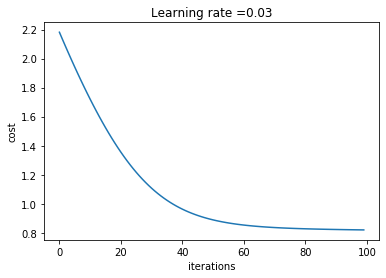

[0.66417006] 0.0
[0.6035087] 1.0
[0.63444] 0.0
[0.62706807] 0.0
[0.67680175] 1.0
[0.64922224] 0.0
[0.6316712] 1.0
[0.64814348] 0.0
[0.67285701] 0.0
[0.64614648] 1.0
[0.55983385] 1.0
[0.66876536] 0.0
[0.66604775] 1.0
[0.67839424] 0.0
[0.59458904] 1.0
[0.63540427] 0.0
[0.68793204] 0.0
[0.65846486] 1.0
[0.60398813] 1.0
[0.61869216] 0.0
[0.68556279] 0.0
[0.65634784] 1.0
[0.64547993] 0.0
[0.62474696] 0.0
[0.61194168] 0.0
[0.6051889] 0.0
[0.64600387] 1.0
[0.63680209] 1.0
[0.56458563] 1.0
[0.57657463] 1.0
[0.66843679] 1.0
[0.63156997] 0.0
[0.64072272] 1.0
[0.66170598] 1.0
[0.61949694] 1.0
[0.61984086] 1.0
[0.62388673] 0.0
[0.61638463] 0.0
[0.65420052] 0.0
[0.61215989] 1.0
51.24999999999999


In [0]:
layers_dims = [X_train.shape[1], 16, 64, 18, 1]
parameters_tanh = L_layer_model( X_train, a1, layers_dims, learning_rate=0.03, num_iterations=100, hidden_layers_activation_fn="sigmoid")

In [0]:
for i in range(0,40):
   print(layer_2[i],Y_test[i])

In [0]:
a = 0
for i in range(0,2000):
  if layer_2[i] <= 0.50 and Y_test[i] == 0 :
    a += 1
  elif layer_2[i] > 0.50 and Y_test[i] == 1 :
    a += 1
print((a/2000)*100)

NameError: ignored

In [0]:
type(np.random.rand(3,3))

numpy.ndarray

In [0]:
import numpy as np